# DESCRIPTION OF THE DATASET : 

- PassengerId : Passenger ID 
- Survived : Weather Survived or not (0 = No, 1 = Yes)
- Pclass : Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd
- Name : Name of the Passenger
- Sex : Gender
- Age : Age in Years
- SibSp : No. of siblings / spouses 
- Parch : No. of parents / children
- Ticket : Ticket number
- Fare : Passenger fare
- Cabin : 
- Embarked : Port of Embarkation (C : Cherbourg, Q : Queenstown, S : Southampton)

---
With the help of Titanic passenger data (name, age, price of ticket, etc), we try to predict few things.

In [1]:
#Importing basic Python Libraries : 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To read csv file of titanic
titanic_ship = pd.read_csv(r"D:\Datasets\titanic.csv") #here titanic user defined dataframe

In [3]:
# Show 10 random data : 

titanic_ship.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S


In [4]:
# Remove unwanted columns such as PassengerId, Name, Ticket

titanic_ship.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [5]:
# Total no. of rows & cols
titanic_ship.shape

(891, 9)

In [6]:
#To show the datatypes of all the mentioned columns, use inbuilt attributes dtype
titanic_ship.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
#To show all information of given dataset
titanic_ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
#Null Values in the given dataset
titanic_ship.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
#To fill the null values of Age by finding its average 
titanic_ship["Age"].fillna(titanic_ship["Age"].mean(), inplace = True)

# Change the dtype of Age from float to int.
titanic_ship["Age"] = titanic_ship["Age"].astype('int64')

In [10]:
#Finding the percentage of null values of Cabin column

titanic_ship["Cabin"].isnull().sum() * 100 / titanic_ship.shape[0]

77.10437710437711

In [11]:
#Dropping / deleting the Cabin column 
#The column of Cabin has more than 60%, so it has to to be deleted

titanic_ship.drop("Cabin", axis = 1, inplace = True)
titanic_ship

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [12]:
#The most appeared values in Embarked column is 'S' which is 'Southampton'
#Replacing the missing values with 'S' 

titanic_ship["Embarked"].fillna('S', inplace = True)
titanic_ship

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


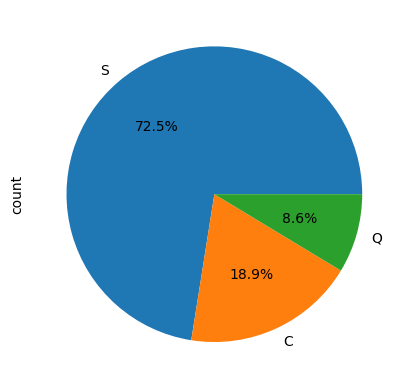

In [13]:
#Finding the most appeared values in Embarked column

print(titanic_ship["Embarked"].value_counts())
titanic_ship["Embarked"].value_counts().plot(kind = "pie", autopct = "%.1f%%")
plt.show()

In [14]:
#To show Pclass of the titanic data, duplicate not allowed

titanic_ship["Pclass"].unique()

array([3, 1, 2], dtype=int64)

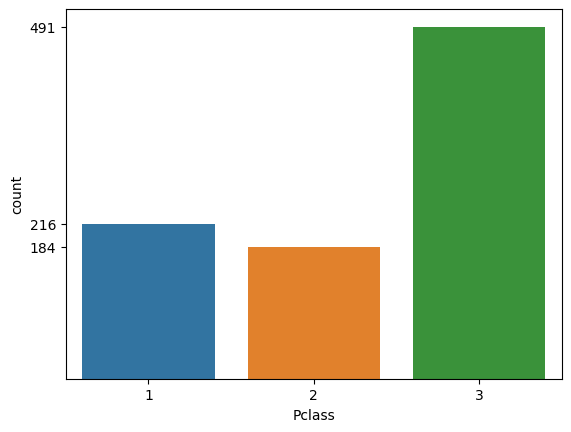

In [15]:
#How many times each class is mentioned
vc = titanic_ship["Pclass"].value_counts()

sns.countplot(data = titanic_ship, x = "Pclass")
plt.yticks(vc)
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


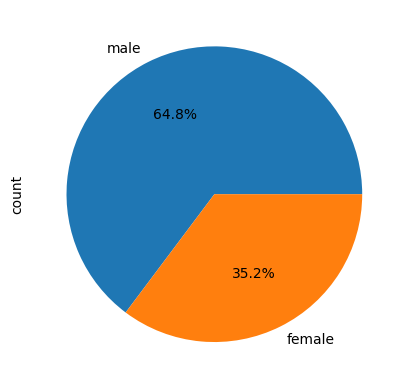

In [16]:
# How many Males and Females were there

print(titanic_ship["Sex"].value_counts())
titanic_ship['Sex'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')
plt.show()

In [17]:
#To show the records of female passengers of 1st, 2nd and 3rd class
print("Number of Females in Class '1' : ", titanic_ship[(titanic_ship["Pclass"] == 1) & (titanic_ship["Sex"] == "female")].shape[0])
print("Number of Females in Class '2' : ", titanic_ship[(titanic_ship["Pclass"] == 2) & (titanic_ship["Sex"] == 'female')].shape[0])
print("Number of Females in Class '3' : ", titanic_ship[(titanic_ship["Pclass"] == 3) & (titanic_ship["Sex"] == 'female')].shape[0])

Number of Females in Class '1' :  94
Number of Females in Class '2' :  76
Number of Females in Class '3' :  144


In [18]:
#To show the records of male passengers of 1st, 2nd and 3rd class
print("Number of Males in Class '1' : ",titanic_ship[(titanic_ship["Pclass"] == 1) & (titanic_ship["Sex"] == 'male')].shape[0])
print("Number of Males in Class '2' : ",titanic_ship[(titanic_ship["Pclass"] == 2) & (titanic_ship["Sex"] == 'male')].shape[0])
print("Number of Males in Class '3' : ",titanic_ship[(titanic_ship["Pclass"] == 3) & (titanic_ship["Sex"] == 'male')].shape[0])

Number of Males in Class '1' :  122
Number of Males in Class '2' :  108
Number of Males in Class '3' :  347


In [19]:
#To show highest Fare of the titanic_ship
titanic_ship["Fare"].max()

512.3292

In [20]:
#To show record no. of highest Fare of the titanic_ship
#idx means record / index no.
titanic_ship["Fare"].idxmax()

258

In [21]:
#To show all details of record no. 258
titanic_ship.iloc[258]  #iloc[rowindex] : iloc means index location

Survived           1
Pclass             1
Sex           female
Age               35
SibSp              0
Parch              0
Fare        512.3292
Embarked           C
Name: 258, dtype: object

In [22]:
#To show the total Fare of Pclass
 
titanic_ship.groupby("Pclass")["Fare"].sum()

Pclass
1    18177.4125
2     3801.8417
3     6714.6951
Name: Fare, dtype: float64

In [23]:
#To show the total Fare according to Passenger Class and Sex
 
titanic_ship.groupby(["Pclass", "Sex"])["Fare"].sum()

Pclass  Sex   
1       female    9975.8250
        male      8201.5875
2       female    1669.7292
        male      2132.1125
3       female    2321.1086
        male      4393.5865
Name: Fare, dtype: float64

Parch     0   1   2  3  4  5  6
Sex                            
female  194  60  49  4  2  4  1
male    484  58  31  1  2  1  0


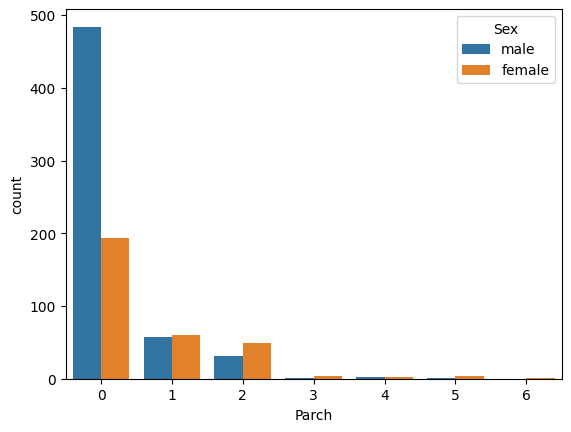

In [24]:
#Show differenciation of genders according to Parch
# Parch : No. of parents / children 

print(pd.crosstab(titanic_ship["Sex"], titanic_ship["Parch"]))
sns.countplot(data = titanic_ship, x = "Parch", hue = "Sex")
plt.show()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


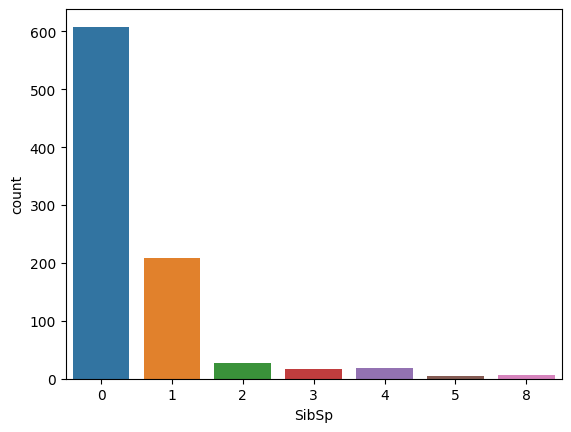

In [25]:
#To show the column of Sibsp
# Sibsp : No. of siblings / spouses

sns.countplot(data = titanic_ship, x = "SibSp") 
print(titanic_ship["SibSp"].value_counts())  #find the frequency
plt.show()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


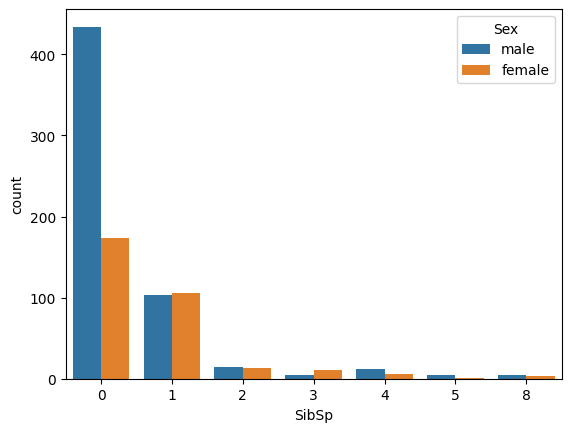

In [26]:
#To show Sibsp (siblings / spouses) according to Genders

sns.countplot(data = titanic_ship, x = "SibSp", hue = "Sex")  
print(titanic_ship["SibSp"].value_counts())   #find the frequency
plt.show()

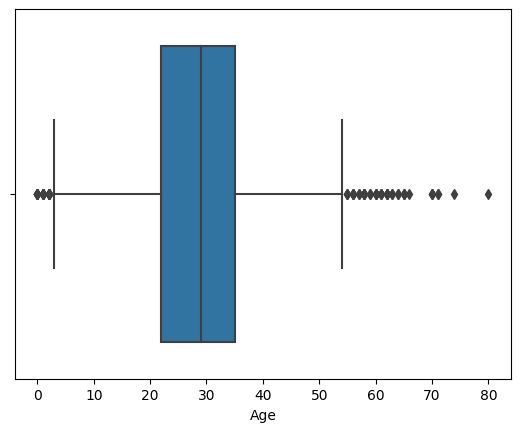

Aged People : 26
Children below age 10 : 64


In [27]:
#To show the difference between ages gap

sns.boxplot(x = titanic_ship['Age'])
plt.show()

print("Aged People :", titanic_ship[(titanic_ship["Age"] >= 60)].shape[0])
print("Children below age 10 :", titanic_ship[titanic_ship["Age"] <= 10].shape[0])

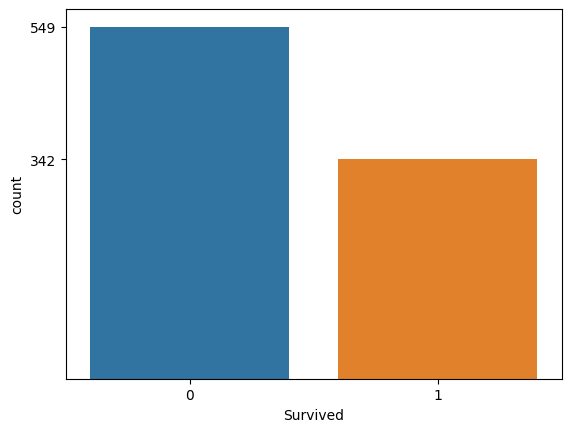

Out of 891, '62%' people Died in the accident.
Out of 891, '38%' people Survived in the accident.


In [183]:
# Check how many people had Survived
# Survived : Weather Survived or not: 0 = No, 1 = Yes

x = titanic_ship['Survived'].value_counts()
sns.countplot(data = titanic_ship, x = "Survived")
plt.yticks(x)
plt.show()

death_rate = round(titanic_ship["Survived"].value_counts().values[0] * 100 / titanic_ship.shape[0])
print(f"Out of 891, '{death_rate}%' people Died in the accident.")

survived_rate = round(titanic_ship['Survived'].value_counts().values[1] * 100 / titanic_ship.shape[0])
print(f"Out of 891, '{survived_rate}%' people Survived in the accident.")

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


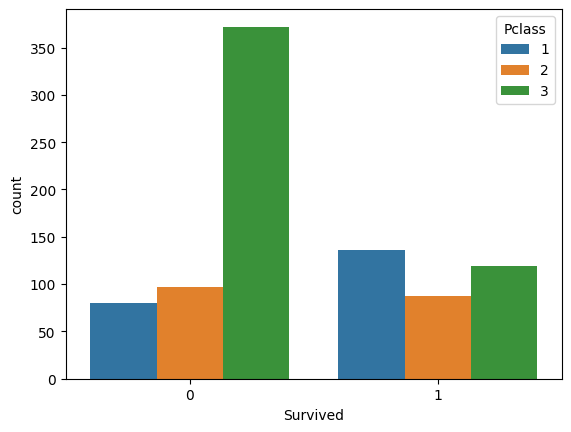

In [29]:
#To show how many people Survived according to Passenger Class

print(pd.crosstab(titanic_ship["Pclass"], titanic_ship["Survived"]))
sns.countplot(data = titanic_ship, x = "Survived", hue = titanic_ship["Pclass"])
plt.show()

Survived    0    1
Sex               
female     81  233
male      468  109


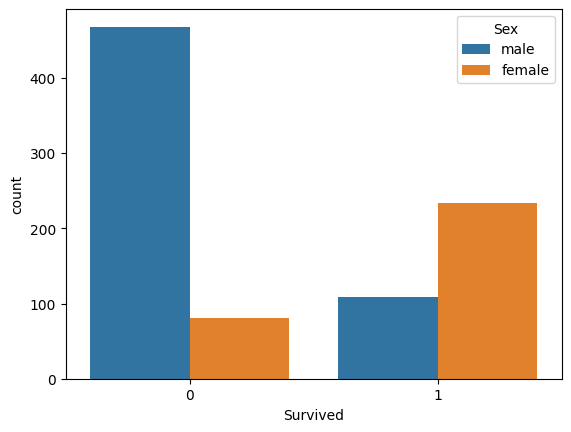

In [30]:
#How many people Survived according to Gender 

print(pd.crosstab(titanic_ship["Sex"], titanic_ship["Survived"]))
sns.countplot(data = titanic_ship, x = "Survived", hue = titanic_ship["Sex"])
plt.show()

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  219


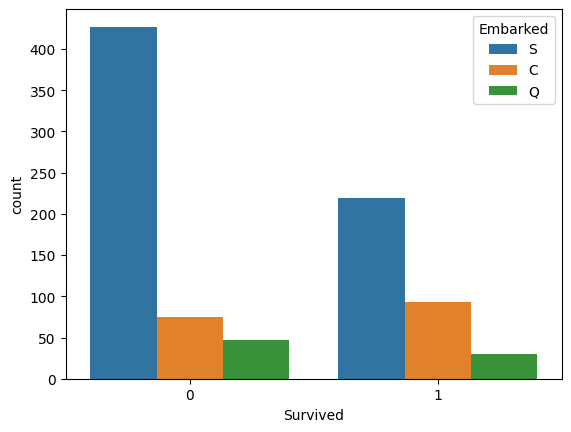

In [31]:
#Survival with Embarked (Places where the passengers were going)

print(pd.crosstab(titanic_ship["Embarked"], titanic_ship["Survived"]))
sns.countplot(data = titanic_ship, x = "Survived", hue = titanic_ship["Embarked"])
plt.show()

---
- The passengers going for the Southampton - S, have more chances of survival rather than Cherbourg - C and Queenstown - Q
---

# CONCLUSIONS

- Out of 891, '38%' people Survived in the accident i.e. 342. And the rest had died i.e. 549
- Most of the passengers were in 3rd Class, then 1st Class & then 3rd Class
- Number of Males are more than the Females
- Total '90' passengers were aged and children below 10
- Most of the passengers died who were travelling in 3rd Class
- Most of females survived, because they were kept as the high prioty
- Most of the people died on the way to 'S' place (Southampton)

In [32]:
#Handling categorical and numerical type data

categorial = titanic_ship.select_dtypes('object')
numerical = titanic_ship.select_dtypes(['int64', 'float64'])

In [33]:
# To check no. of categories of each Categorical features

for feature in categorial : 
    print(f"Feature : {feature} \nNo. of Categories : {titanic_ship[feature].unique()}")
    print('\n')

Feature : Sex 
No. of Categories : ['male' 'female']


Feature : Embarked 
No. of Categories : ['S' 'C' 'Q']




In [34]:
# To convert object type data into numerical type data using LabelEncoder
from sklearn.preprocessing import LabelEncoder

for col in categorial : 
    # Create object of LabelEncoder class
    le = LabelEncoder()
    categorial[col] = le.fit_transform(categorial[col])

In [35]:
# To concatenate categorial and numerical

df = pd.concat([categorial, numerical], axis = 1)
df.sample(10)

,Sex,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
602,1,2,0,1,29,0,0,42.4000
266,1,2,0,3,16,4,1,39.6875
48,1,0,0,3,29,2,0,21.6792
634,0,2,0,3,9,3,2,27.9000
350,1,2,0,3,23,0,0,9.2250
719,1,2,0,3,33,0,0,7.7750
793,1,0,0,1,29,0,0,30.6958
69,1,2,0,3,26,2,0,8.6625
753,1,2,0,3,23,0,0,7.8958
857,1,2,1,1,51,0,0,26.5500


In [36]:
# Select Input (features) and Output (target)

X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [37]:
# Split the model into 70% Training data and 30% Testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [38]:
# Apply Standard Scaling on 70% input Training data and 30% input Testing data
from sklearn.preprocessing import StandardScaler

#Create object of StandardScaler class
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# NOTE : fit_transform only uses in 70% input training data (fit means to train and then change)
#        transform only uses in 30% testing data

In [39]:
# Create a user defined function
# Call Evaluation score 
from sklearn.metrics import classification_report, confusion_matrix

def create_model(model) : 
    
    # Train the model with 70% data
    model.fit(X_train, Y_train) 
    # Test the model with 30% data
    Y_pred = model.predict(X_test)
    # Print Evaluation score (Accuracy Reports)
    print(classification_report(Y_test, Y_pred))
    print(confusion_matrix(Y_test, Y_pred))
     
    return model

In [40]:
# Perform LogisticRegression class
from sklearn.linear_model import LogisticRegression

#Create object of LogisticRegression class
lr = LogisticRegression()

In [41]:
#Call function
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       153
           1       0.77      0.68      0.72       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

[[130  23]
 [ 37  78]]


In [42]:
# Perform Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Create object of DecisionTreeClassifier class
dt = DecisionTreeClassifier()        #by default Gini Index

In [43]:
#Call function
dt = create_model(dt)

#Reason behind less score : the model is overfit

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       153
           1       0.75      0.63      0.68       115

    accuracy                           0.75       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268

[[129  24]
 [ 43  72]]


- To reduce overfitting situation, use Pruning Technique or Entropy

In [44]:
# Check Information Gain 
# Sorting values
IG = dt.feature_importances_
cols = X.columns

# Create a dictionary for Input & Information Gain
dic = {'Input' : cols, 'Information_Gain' : IG}
dtc = pd.DataFrame(dic)
dtc.sort_values('Information_Gain', ascending = False)

,Input,Information_Gain
0,Sex,0.331856
3,Age,0.248436
6,Fare,0.203185
2,Pclass,0.110269
4,SibSp,0.066005
1,Embarked,0.029451
5,Parch,0.010798


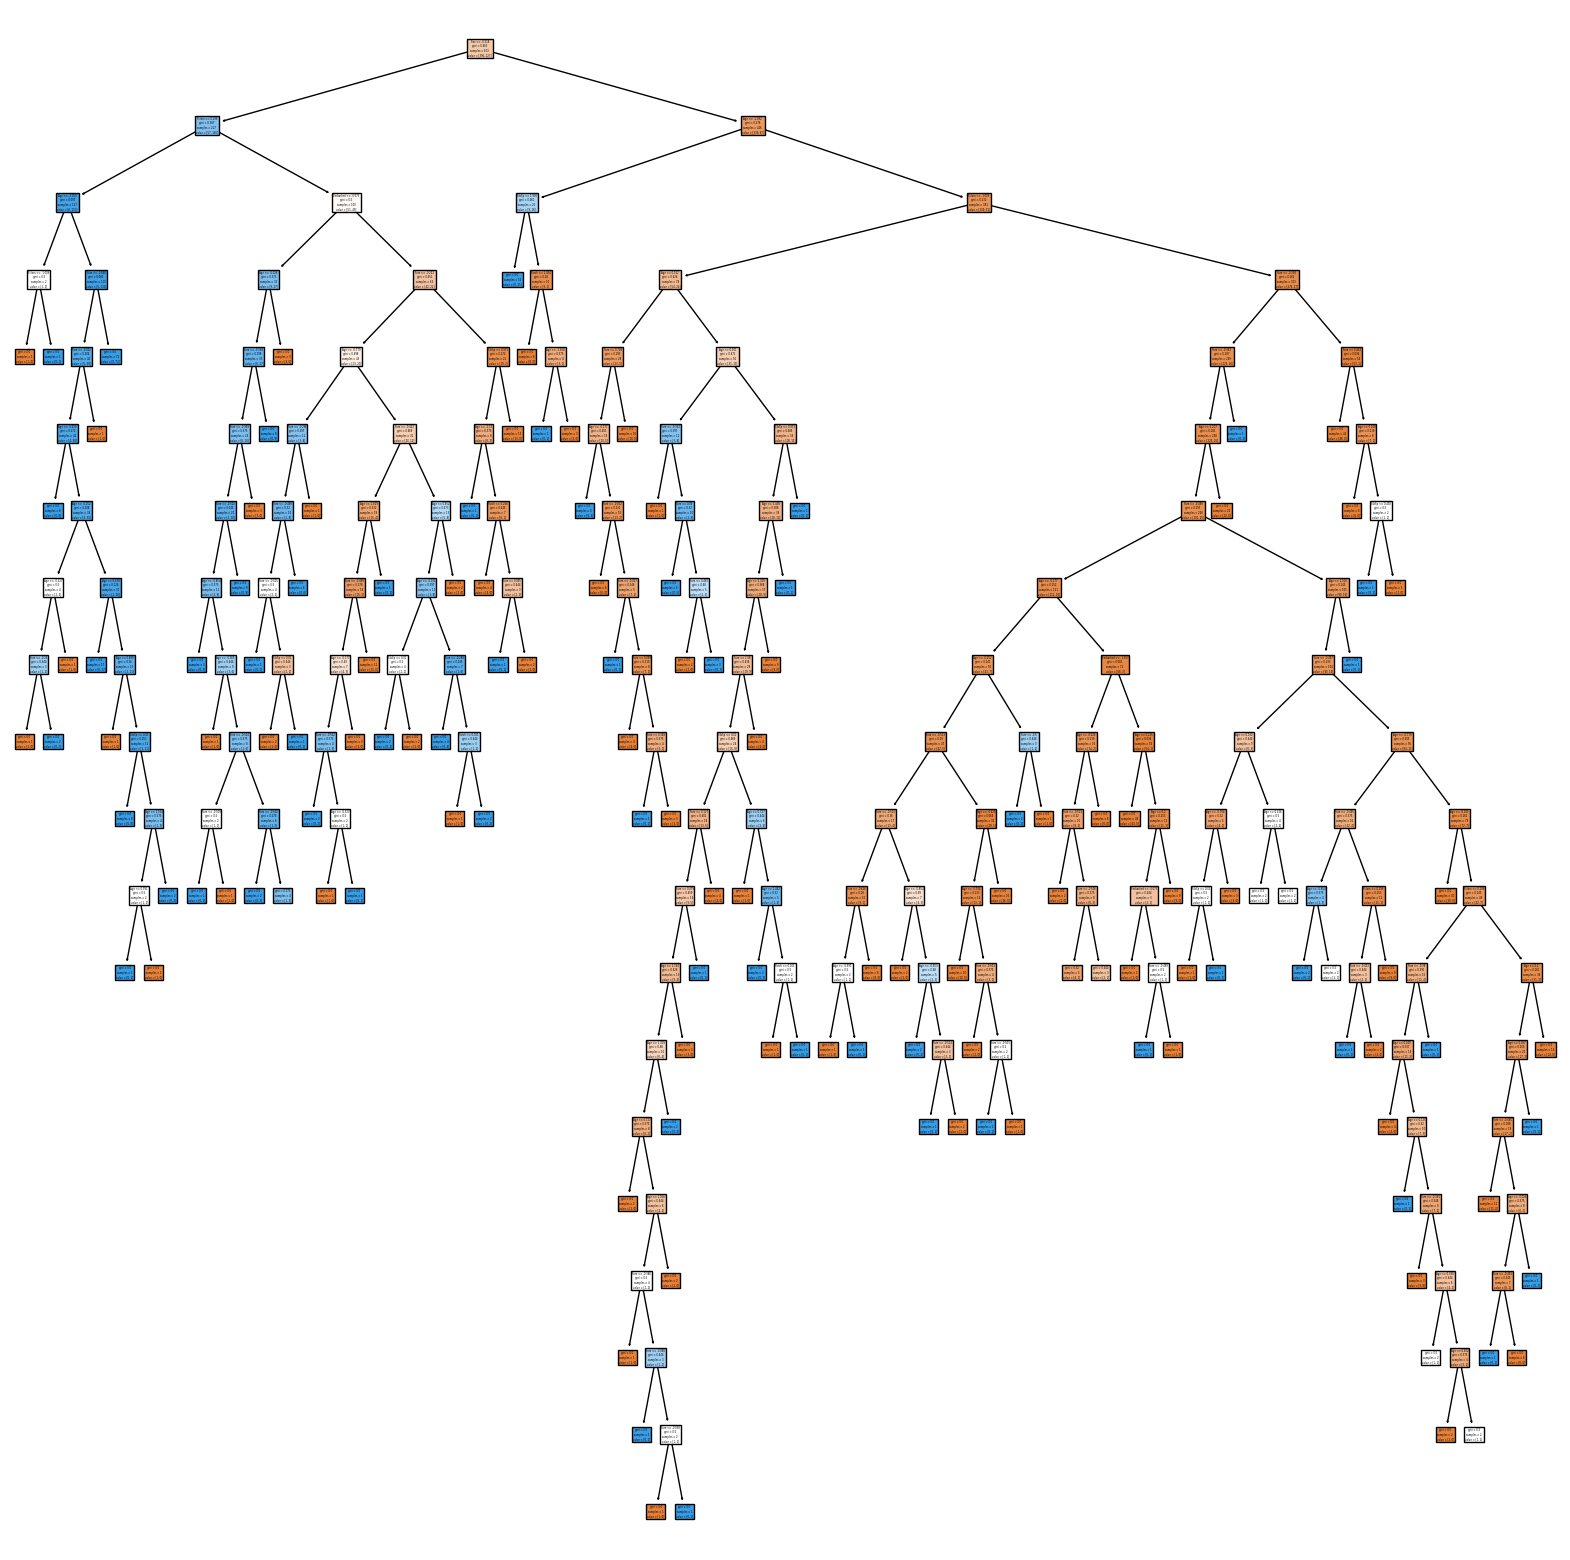

In [45]:
# Create a Tree
from sklearn import tree

plt.figure(figsize = (20, 20))
features = X.columns
_ = tree.plot_tree(dt, feature_names = features.tolist(), filled = True)

#### NOTE : -> 
Even the slightest change in the pattern at the output does not predict correctly means that the model is Overfit. Because it does not remove the less important features, but it shifts to very bottom of the tree (branch) means it makes difference to the output coz of which the model is Overfit.

In [46]:
# To reduce the Overfit situation, use Pruning Technique
# formula : 1 - P^2 - Q^2           #i.e. P:Yes & Q:No
# max_depth : inbuilt parameter
# Create object for max_depth

dt1 = DecisionTreeClassifier(max_depth = 1, random_state = 1)   #max_depth should be less than 8

In [47]:
# Call function

dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

[[129  24]
 [ 42  73]]


In [48]:
# Check Information Gain 
IG = dt1.feature_importances_

#Create a dictionary
dic = {"Input_X" : X.columns, "Information_Gain" : IG}
df1 = pd.DataFrame(dic)
# Sorting values
df1.sort_values("Information_Gain", ascending = False)

# Here, it shows the most important feature is 'Sex'

,Input_X,Information_Gain
0,Sex,1.0
1,Embarked,0.0
2,Pclass,0.0
3,Age,0.0
4,SibSp,0.0
5,Parch,0.0
6,Fare,0.0


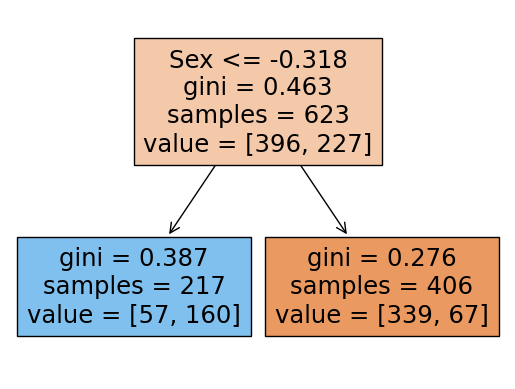

In [49]:
# Create a tree
_ = tree.plot_tree(dt1, feature_names = features.tolist(), filled = True)

In [50]:
# min_samples_leaf of Pruning technique : inbuilt parameter
# Create object for min_samples_leaf

dt2 = DecisionTreeClassifier(min_samples_leaf = 50, random_state = 1)       # It should be below 80

In [51]:
# Call function
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       153
           1       0.94      0.43      0.60       115

    accuracy                           0.75       268
   macro avg       0.82      0.71      0.71       268
weighted avg       0.80      0.75      0.72       268

[[150   3]
 [ 65  50]]


In [52]:
# Check Information Gain 
IG = dt2.feature_importances_

#Create a dictionary
dic = {"Input_X" : X.columns, "Information_Gain" : IG}
df2 = pd.DataFrame(dic)
# Sorting values
df2.sort_values('Information_Gain', ascending = False)

,Input_X,Information_Gain
0,Sex,0.728128
2,Pclass,0.178351
3,Age,0.047273
6,Fare,0.046247
1,Embarked,0.000000
4,SibSp,0.000000
5,Parch,0.000000


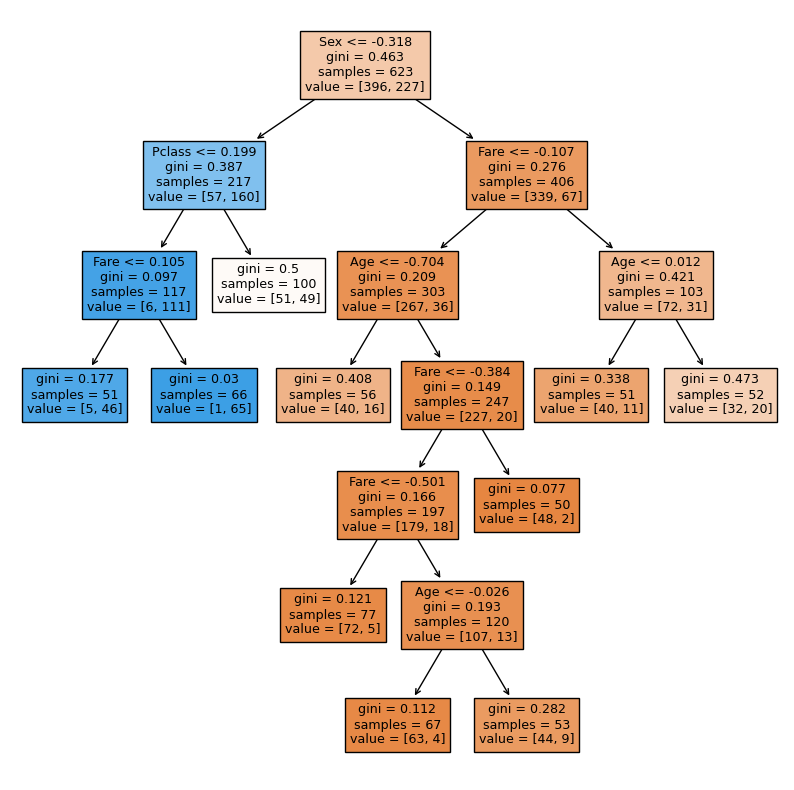

In [53]:
#Create a tree

plt.figure(figsize = (10, 10))
_ = tree.plot_tree(dt2, feature_names = features.tolist(), filled = True)

---
### Conclusion : 

In this model, Pruning Technique of max_depth is best

---

In [54]:
# Use "Entropy" method of Decision Tree - max_depth
# formula : -P(yes) * log2(P(yes)) - Q(no) * log2(Q(no))
# here, log2 means base of log = 2

# Create object for max_depth
dt3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 1)

In [55]:
# Call function
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       153
           1       0.75      0.63      0.69       115

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

[[129  24]
 [ 42  73]]


In [56]:
# Use Entropy method of Decision Tree - min_samples_leaf

# Create object of min_samples_leaf
dt4 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 60, random_state = 1)

In [57]:
# Call function
dt4 = create_model(dt4)

              precision    recall  f1-score   support

           0       0.70      0.98      0.82       153
           1       0.94      0.43      0.60       115

    accuracy                           0.75       268
   macro avg       0.82      0.71      0.71       268
weighted avg       0.80      0.75      0.72       268

[[150   3]
 [ 65  50]]


---
### CONCLUSION : 
In this model, Entropy Technique of max_depth is best

---

In [58]:
# Apply Random Forest Tree of Boostraping Method 
from sklearn.ensemble import RandomForestClassifier

# Create object of RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators = 10, max_features = 2, random_state = 1)

# n_estimators : means no. of decision trees we take 
# max_fetures : means how many inputs we take

In [59]:
# Call function
rfc = create_model(rfc)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       153
           1       0.75      0.65      0.70       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268

[[128  25]
 [ 40  75]]


---
### CONCLUSION : 
In this model, Random Forest Classifier is best

---

In [83]:
# Apply Ada Boost of Boosting Technique
from sklearn.ensemble import AdaBoostClassifier

# Create object of AdaBoostClassifier class
ada = AdaBoostClassifier(n_estimators = 25, random_state = 1)

# n_estimators must be less than 100

In [84]:
# Call function
ada = create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       153
           1       0.80      0.69      0.74       115

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[133  20]
 [ 36  79]]


In [107]:
# Apply Gradient Boosting of Boosting Technique
from sklearn.ensemble import GradientBoostingClassifier

# Create a object of GradientBoostingClassifier class
gbc = GradientBoostingClassifier(n_estimators = 60, random_state = 1)

In [108]:
# Call function 
gbc = create_model(gbc)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       153
           1       0.84      0.61      0.71       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268

[[140  13]
 [ 45  70]]


---
### CONCLUSION : 
In this model, Boosting Technique of Ada Boost technique is best

---

In [134]:
# Apply Extreme Gradient Boosting (XGB) of Boosting Technique
from xgboost import XGBClassifier

# Create object of XGBClassifier
xgb = XGBClassifier(n_estimators = 15, reg_alpha = 1, random_state = 1)

# automatic overfitting : reg means regularization and alpha means lambda : hyperparameter and 1 means True
# n_estimators can be <= 100

In [135]:
# Call function
xgb = create_model(xgb)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       153
           1       0.85      0.59      0.70       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.76       268
weighted avg       0.79      0.78      0.77       268

[[141  12]
 [ 47  68]]


In [146]:
# Apply KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

# 'K' is the hyperparameter for KNN and it means it selects the distance between 2  points 
# n_neighbors : To define the required neighbors of the algo. 
# metric = 'minkowski' : This is the default parameter and it decides the distance between the data points
# p = 2 : It is the equivalent to the standard Euclidean metric means sqrt(X2 - X1) ** 2 + (Y2 - Y1) ** 2

In [147]:
# Call function
knn = create_model(knn)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       153
           1       0.77      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268

[[132  21]
 [ 43  72]]


In [150]:
# Apply Linear kernel function of SVM (Support Vector Machine)
from sklearn.svm import LinearSVC

# Create object for LinearSVC class (hard margin)
svc = LinearSVC(random_state = 1)

# by default hard margin means we did not added error

In [151]:
# Call function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       153
           1       0.76      0.66      0.71       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268

[[129  24]
 [ 39  76]]


In [162]:
# Reduce overfitting situation (soft margin) means added some error on Training time
# Create object of LinearSVC class
svc1 = LinearSVC(random_state = 1, C = 0.5)

In [163]:
# Call function
svc1 = create_model(svc1)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       153
           1       0.76      0.66      0.71       115

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268

[[129  24]
 [ 39  76]]


---
###### NOTE : 
If added external error on Training time but no any changes on score means given dataset is non-linear

---

In [168]:
# Apply Non-Linear kernel SVC
# Polynomial kernel function (non-linear) : It increases the low dimension to high dimension
from sklearn.svm import SVC

# Create object polynomial class
poly = SVC(random_state = 1, kernel = 'poly')

In [169]:
# Call function
poly = create_model(poly)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       153
           1       0.84      0.60      0.70       115

    accuracy                           0.78       268
   macro avg       0.80      0.76      0.76       268
weighted avg       0.79      0.78      0.77       268

[[140  13]
 [ 46  69]]


In [172]:
# Here, the score of Polynomial is not so good, use Radial Basis Kernel Function
# Apply radial basis kernel function (non-linear)
radial = SVC(random_state = 1, kernel = 'rbf')

In [173]:
# Call function
radial = create_model(radial)

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       153
           1       0.85      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[141  12]
 [ 49  66]]


---
# CONCLUSION : 
- In this dataset, the accuracy of Pruning Techinque (max_depth) of Decision Tree, Ada Boosting & SVM (Linear) is nice.

---